<a href="https://colab.research.google.com/github/SanketAinapure/ALL-Projects/blob/main/Neural_Network_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow version
%tensorflow_version 2.x

import tensorflow as tf
print("TensorFlow version: " + tf.__version__)

# Find GPU device
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Fix random seed for reproducibility
np.random.seed(9)

TensorFlow version: 2.8.0
Found GPU at: /device:GPU:0


In [ ]:
# Classifications
classes = ["airplanes", "automobile", "bird", "cat", "deer", "dog", "frog",
          "horse", "ship", "truck"]

# Parameters
num_classes = 10
epochs = 150 # 100, 120
batch_size = 150 # 32

data_augmentation = False

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'assignment NN.h5'

In [ ]:
# Download and prepare CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("[INFO] train images shape: {}".format(train_images.shape))
print("[INFO] train samples: {}".format(train_images.shape[0]))

print("[INFO] test images shape: {}".format(test_images.shape))
print("[INFO] test samples: {}".format(test_images.shape[0]))

# Apply one-hot encoding
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

[INFO] train images shape: (50000, 32, 32, 3)
[INFO] train samples: 50000
[INFO] test images shape: (10000, 32, 32, 3)
[INFO] test samples: 10000


In [ ]:
# TODO: Valid means no padding, same means using padding, ZeroPadding
# GlobalAveragePooling (no 8x8), AveragePooling (you can state size and stride), MaxPooling

# 1. 47%, 49%; ZeroPadding, MaxPooling, AveragePooling, GlobalAveragePooling
# 2. 47%, 50%; ZeroPadding, MaxPooling, AveragePooling, GlobalAveragePooling

# Model
model = Sequential()

# Conv1 - filter size = 5x5, # of filter = 192, pad = 2, stride = 1, Act. = ReLU
model.add(Conv2D(192, kernel_size=(5, 5), activation='relu', strides=1, input_shape=train_images.shape[1:]))
# Zero padding
model.add(ZeroPadding2D(padding=2))
# mlp 1 - filter size = 5x5, # of filter = 160, pad = 0, stride = 1, Act. = ReLU
model.add(Dense(160, activation='relu'))
# mlp 2 - filter size = 5x5, # of filter = 96, pad = 0, stride = 1, Act. = ReLU
model.add(Dense(96, activation='relu'))
# Pool 1 - 3x3 max pooling, stride = 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# Dropout 0.5
model.add(Dropout(0.5))


# Conv2 - filter size = 5x5, # of filter = 192, pad = 2, stride = 1, Act. = ReLU
model.add(Conv2D(192, kernel_size=(5, 5), activation='relu', strides=1))
# Zero padding
model.add(ZeroPadding2D(padding=2))
# mlp 2-1 - filter size = 5x5, # of filter = 160, pad = 0, stride = 1, Act. = ReLU
model.add(Dense(192, activation='relu'))
# mlp 2-2 - filter size = 5x5, # of filter = 96, pad = 0, stride = 1, Act. = ReLU
model.add(Dense(192, activation='relu'))
# Pool 2 - 3x3 max pooling, stride = 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# model.add(AveragePooling2D(pool_size=(3, 3), strides=2))
# Dropout 0.5
model.add(Dropout(0.5))


# Conv3 - filter size = 3x3, # of filter = 192, pad = 1, stride = 1, Act. = ReLU
model.add(Conv2D(192, kernel_size=(3, 3), activation='relu', strides=1))
# Zero padding
model.add(ZeroPadding2D(padding=1))
# mlp 3-1 - filter size = 1x1, # of filter = 192, pad = 0, stride = 1, Act. = ReLU
model.add(Dense(192, activation='relu'))
# mlp 3-2 - filter size = 1x1, # of filter = 10, pad = 0, stride = 1, Act. = ReLU
model.add(Dense(10, activation='relu'))
# Global Average Pooling - 3x3 max pooling, stride = 2
model.add(GlobalAveragePooling2D())
# model.add(AveragePooling2D(pool_size=(8, 8), strides=1)) DOESNT WORK?

# Add softmax activation function
model.add(Dense(num_classes, activation='softmax'))

# Show a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 192)       14592     
                                                                 
 zero_padding2d_9 (ZeroPaddi  (None, 32, 32, 192)      0         
 ng2D)                                                           
                                                                 
 dense_21 (Dense)            (None, 32, 32, 160)       30880     
                                                                 
 dense_22 (Dense)            (None, 32, 32, 96)        15456     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 96)       

In [ ]:
# Compile the model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss=tf.keras.losses.categorical_crossentropy, # tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                             # 'categorical_crossentropy', 'tf.keras.losses.categorical_crossentropy'
              optimizer = opt,
              metrics=['accuracy'])

# 3. 'adam' showing better performance over 10 epochs than RMSprop with 1e-6 decay: 70%, 68%
# 4.

In [ ]:
# Build and evaluate the model
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size, epochs=epochs, verbose=1, shuffle=True) # shuffle=False

Epoch 1/150
334/334 [==============================] - 23s 64ms/step - loss: 2.1833 - accuracy: 0.1642 - val_loss: 2.0134 - val_accuracy: 0.2167
Epoch 2/150
334/334 [==============================] - 21s 63ms/step - loss: 1.9204 - accuracy: 0.2788 - val_loss: 1.8332 - val_accuracy: 0.3116
Epoch 3/150
334/334 [==============================] - 21s 63ms/step - loss: 1.7771 - accuracy: 0.3283 - val_loss: 1.7301 - val_accuracy: 0.3345
Epoch 4/150
334/334 [==============================] - 21s 63ms/step - loss: 1.7047 - accuracy: 0.3600 - val_loss: 1.7371 - val_accuracy: 0.3516
Epoch 5/150
334/334 [==============================] - 21s 64ms/step - loss: 1.6493 - accuracy: 0.3808 - val_loss: 1.5946 - val_accuracy: 0.3968
Epoch 6/150
334/334 [==============================] - 21s 64ms/step - loss: 1.6015 - accuracy: 0.3991 - val_loss: 1.5438 - val_accuracy: 0.4297
Epoch 7/150
334/334 [==============================] - 21s 64ms/step - loss: 1.5530 - accuracy: 0.4172 - val_loss: 1.5374 - val_ac

In [ ]:
# Score the model
score = model.evaluate(test_images, test_labels, verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.5225 - accuracy: 0.8329
Test loss:  0.5225202441215515
Test accuracy:  0.8328999876976013


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


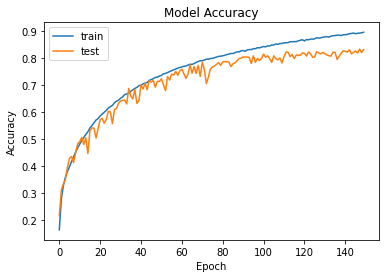

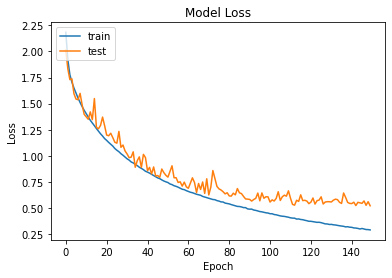

In [ ]:
print(history.history.keys())

# History plot for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# History plot for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
# Save the model
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print("Saved trained model at %s" % model_path)

Saved trained model at /content/saved_models/assignment NN.h5


In [ ]:
# Load and test the model
model = load_model(model_path)

# Loop through all test images
for i in range(1, 16):
  pic_name = 'Images for NN/' + str(i) + '.jpg'
  im = Image.open(pic_name)
  im = np.array(im).reshape(1, 32, 32, 3)

  res = model.predict(im)
  pred = np.argmax(res)
  print(i, pred)
  print(classes[pred])
  print('\n')
  #image no , class , classification

1 1
automobile


2 0
airplanes


3 8
ship


4 7
horse


5 2
bird


6 5
dog


7 1
automobile


8 4
deer


9 3
cat


10 0
airplanes


11 1
automobile


12 1
automobile


13 0
airplanes


14 3
cat


15 3
cat


